In [44]:
#necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [45]:
# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')


In [46]:
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data = data.drop(columns_to_drop, axis=1, errors='ignore')
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
data.shape

(5572, 2)

# Tokenization and cleaning

In [49]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Clean the "v2" column
data['v2'] = data['v2'].str.lower()

# Tokenization and cleaning of data
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

data['v2'] = data['v2'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['v2'])

# Label Encoding
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['v1'], test_size=0.2, random_state=42)

# Check the shape of the TF-IDF matrix and the split data
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

TF-IDF Matrix Shape: (5572, 8672)
Training Data Shape: (4457, 8672)
Testing Data Shape: (1115, 8672)


# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_rfc = accuracy_score(y_test, y_pred)
classification_rep_rfc = classification_report(y_test, y_pred)

# Print the results
print("Accuracy for Randorm Forest Classification:", accuracy_rfc)
print("classification report:\n", classification_rep_rfc)



Accuracy for Randorm Forest Classification: 0.9766816143497757
classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



#  **Testing model for Random Forest Classification**

In [53]:

input_text = """Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""

# Apply the same preprocessing as in your previous code
input_text = input_text.lower()
# Add more preprocessing steps if needed

# Transform the input text into a TF-IDF vector
input_tfidf = tfidf_vectorizer.transform([input_text])

# Make a prediction using the trained Random Forest model
prediction = rf_classifier.predict(input_tfidf)

# predictions
if prediction[0] == 1:
    print("This message is predicted to be SPAM by trained model.")
else:
    print("This message is predicted to be NOT SPAM by trained model.")

This message is predicted to be SPAM by trained model.


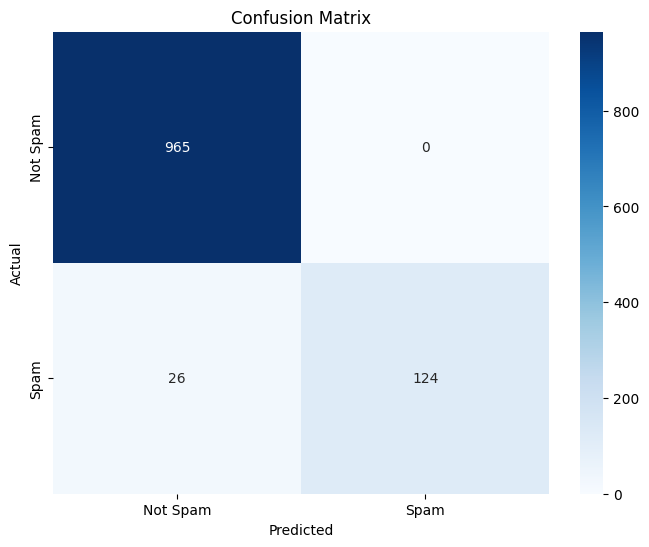

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#  **Naive Buyes Classification Model**

In [55]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Preprocess the text data (you can reuse your preprocessing function)
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

data['v2'] = data['v2'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['v2'])

# Label Encoding
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['v1'], test_size=0.2, random_state=42)

# Create and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_nvc = accuracy_score(y_test, y_pred)
classification_rep_nvc = classification_report(y_test, y_pred)

# Print the results
print("Accuracy for Naive Bayes Classification:", accuracy_nvc)
print("Classification Report:\n", classification_rep_nvc)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy for Naive Bayes Classification: 0.9641255605381166
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



#  **Testing model for Naive Buyes Classification**

In [57]:
# Input text
input_text = "Hey, I'm mark. How are you?."

# Apply the same preprocessing as in your previous code
input_text = input_text.lower()
# Add more preprocessing steps if needed

# Transform the input text into a TF-IDF vector
input_tfidf = tfidf_vectorizer.transform([input_text])

# Make a prediction using the trained Multinomial Naive Bayes model
nb_prediction = nb_classifier.predict(input_tfidf)

# Predictions
if nb_prediction[0] == 1:
    print("This message is predicted to be SPAM by the Naive Bayes model.")
else:
    print("This message is predicted to be NOT SPAM by the Naive Bayes model.")


This message is predicted to be NOT SPAM by the Naive Bayes model.


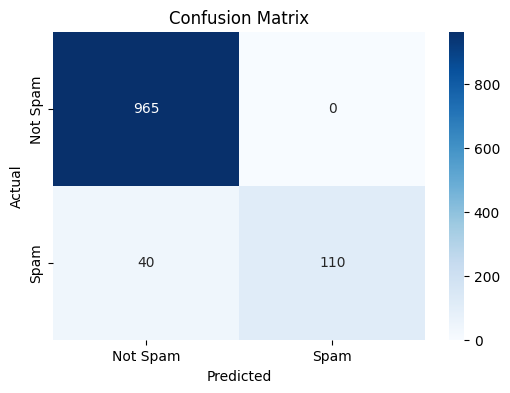

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#  **Support Vector Machine Algorithm Model**

In [59]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Using Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Preprocess the text data (you can reuse your preprocessing function)
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

data['v2'] = data['v2'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['v2'])

# Label Encoding
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['v1'], test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels if needed
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
classification_rep_svm = classification_report(y_test, y_pred)

# Print the results
print("Accuracy For Support Vector Machine:", accuracy_svm)
print("Classification Report:\n", classification_rep_svm)

Accuracy For Support Vector Machine: 0.9775784753363229
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



#  **Testing model for Support Vector Machine**

In [60]:
# Input text
input_text = """Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""

# Apply the same preprocessing as in your previous code
input_text = input_text.lower()
# Add more preprocessing steps if needed

# Transform the input text into a TF-IDF vector
input_tfidf = tfidf_vectorizer.transform([input_text])

# Make a prediction using the trained SVM model
svm_prediction = svm_classifier.predict(input_tfidf)

# Predictions
if svm_prediction[0] == 1:
    print("This message is predicted to be SPAM by the SVM model.")
else:
    print("This message is predicted to be NOT SPAM by the SVM model.")


This message is predicted to be SPAM by the SVM model.


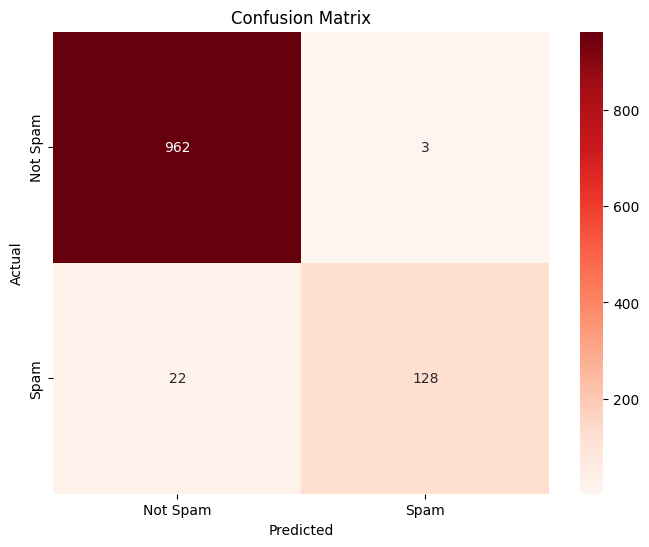

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  ** Logistic Regression**

In [62]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Preprocess the text data (you can reuse your preprocessing function)
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

data['v2'] = data['v2'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['v2'])

# Label Encoding
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['v1'], test_size=0.2, random_state=42)

# Create and train the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_lrm = accuracy_score(y_test, y_pred)
classification_rep_lrm = classification_report(y_test, y_pred)

# Print the results
print("Accuracy for Logistic Regression Model:", accuracy_lrm)
print("Classification Report:\n", classification_rep_lrm)



Accuracy for Logistic Regression Model: 0.9452914798206278
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.95      1115
   macro avg       0.96      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



# **Testing Usning Logistic Regression Model**

In [63]:
# Input text
input_text = """Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""

# Apply the same preprocessing as in your previous code
input_text = input_text.lower()
# Add more preprocessing steps if needed

# Transform the input text into a TF-IDF vector
input_tfidf = tfidf_vectorizer.transform([input_text])

# Make a prediction using the trained Logistic Regression model
logistic_prediction = logistic_classifier.predict(input_tfidf)

# Predictions
if logistic_prediction[0] == 1:
    print("This message is predicted to be SPAM by the Logistic Regression model.")
else:
    print("This message is predicted to be NOT SPAM by the Logistic Regression model.")


This message is predicted to be SPAM by the Logistic Regression model.


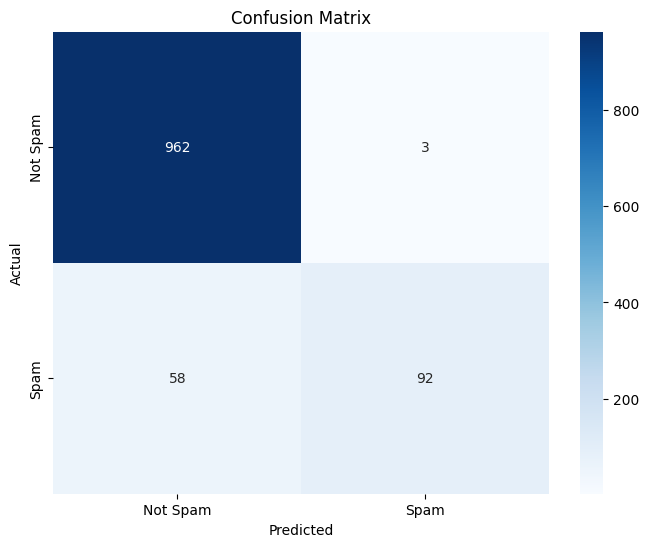

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **K-Nearest Neighbour(KNN)**

In [65]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Preprocess the text data (you can reuse your preprocessing function)
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

data['v2'] = data['v2'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['v2'])

# Label Encoding
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['v1'], test_size=0.2, random_state=42)

# Create and train the K-Nearest Neighbors (K-NN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred)
classification_rep_knn = classification_report(y_test, y_pred)

# Print the results
print("Accuracy For KNN:", accuracy_knn)
print("Classification Report:\n", classification_rep_knn)


Accuracy For KNN: 0.9121076233183857
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.35      0.51       150

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



# **Testing using KNN Methods**

In [66]:
# Input text
input_text = """Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""

# Apply the same preprocessing as in your previous code
input_text = input_text.lower()
# Add more preprocessing steps if needed

# Transform the input text into a TF-IDF vector
input_tfidf = tfidf_vectorizer.transform([input_text])

# Make a prediction using the trained K-NN model
knn_prediction = knn_classifier.predict(input_tfidf)

# Predictions
if knn_prediction[0] == 1:
    print("This message is predicted to be SPAM by the K-NN model.")
else:
    print("This message is predicted to be NOT SPAM by the K-NN model.")


This message is predicted to be NOT SPAM by the K-NN model.


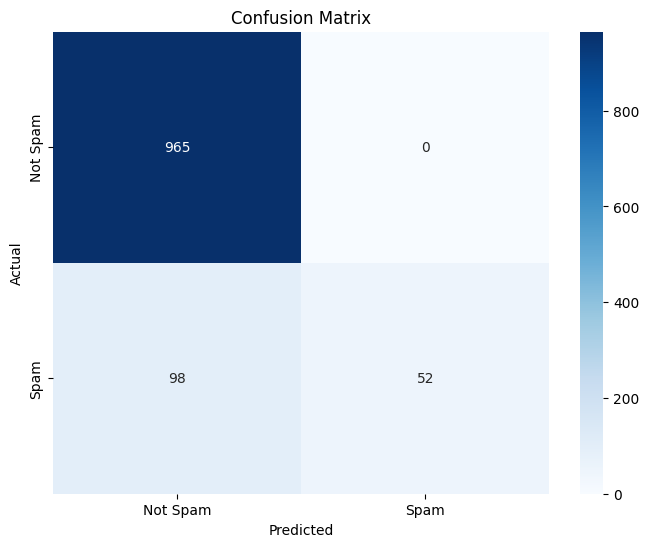

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Decission Tree Classification Methods**

In [68]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Preprocess the text data (you can reuse your preprocessing function)
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

data['v2'] = data['v2'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['v2'])

# Label Encoding
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['v1'], test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred)
classification_rep_dtc = classification_report(y_test, y_pred)

# Print the results
print("Accuracy For Decission Tree Classification:", accuracy_dt)
print("Classification Report:\n", classification_rep_dtc)



Accuracy For Decission Tree Classification: 0.9596412556053812
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       965
           1       0.87      0.83      0.85       150

    accuracy                           0.96      1115
   macro avg       0.92      0.90      0.91      1115
weighted avg       0.96      0.96      0.96      1115



# **Testing Using Decission Tree Classification methods**

In [69]:
# Input text
input_text = """Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""

# Apply the same preprocessing as in your previous code
input_text = input_text.lower()
# Add more preprocessing steps if needed

# Transform the input text into a TF-IDF vector
input_tfidf = tfidf_vectorizer.transform([input_text])

# Make a prediction using the trained Decision Tree model
dt_prediction = dt_classifier.predict(input_tfidf)

# Predictions
if dt_prediction[0] == 1:
    print("This message is predicted to be SPAM by the Decision Tree model.")
else:
    print("This message is predicted to be NOT SPAM by the Decision Tree model.")


This message is predicted to be SPAM by the Decision Tree model.


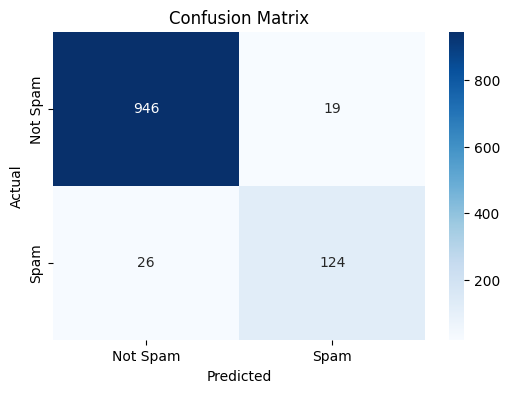

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Gaussian Naive Bayes Algorithm Model**

In [71]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Preprocess the text data (you can reuse your preprocessing function)
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

data['v2'] = data['v2'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['v2'])

# Label Encoding
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['v1'], test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train.toarray(), y_train)  # Note: GaussianNB requires dense input

# Make predictions on the testing data
y_pred = gnb_classifier.predict(X_test.toarray())  # Note: GaussianNB requires dense input

# Evaluate the model's performance
accuracy_gnb = accuracy_score(y_test, y_pred)
classification_rep_gnb = classification_report(y_test, y_pred)

# Print the results
print("Accuracy ForGaussian Naive Bayes:", accuracy_gnb)
print("Classification Report:\n", classification_rep_gnb)



Accuracy ForGaussian Naive Bayes: 0.8600896860986547
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91       965
           1       0.49      0.89      0.63       150

    accuracy                           0.86      1115
   macro avg       0.73      0.87      0.77      1115
weighted avg       0.91      0.86      0.88      1115



# **Testing Using Gaussian Naive Bayes**

In [72]:
# Input text
input_text = """Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""

# Apply the same preprocessing as in your previous code
input_text = input_text.lower()
# Add more preprocessing steps if needed

# Transform the input text into a TF-IDF vector
input_tfidf = tfidf_vectorizer.transform([input_text])

# Make a prediction using the trained Gaussian Naive Bayes model
gnb_prediction = gnb_classifier.predict(input_tfidf.toarray())  # Note: GaussianNB requires dense input

# Predictions
if gnb_prediction[0] == 1:
    print("This message is predicted to be SPAM by the Gaussian Naive Bayes model.")
else:
    print("This message is predicted to be NOT SPAM by the Gaussian Naive Bayes model.")


This message is predicted to be SPAM by the Gaussian Naive Bayes model.


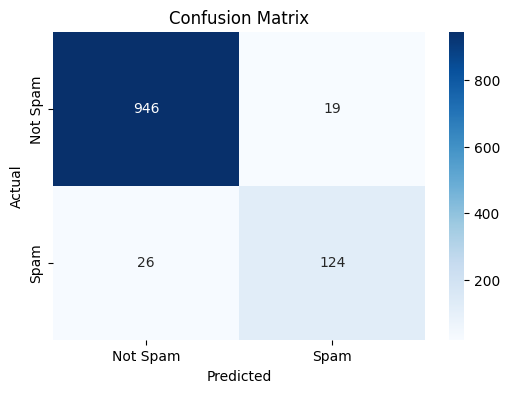

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Ensemble Methods Classification Algorithm**

In [74]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Preprocess the text data (you can reuse your preprocessing function)
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

data['v2'] = data['v2'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['v2'])

# Label Encoding
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['v1'], test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_em = accuracy_score(y_test, y_pred)
classification_rep_em = classification_report(y_test, y_pred)

# Print the results
print("Accuracy For Ensemble Method Classification:", accuracy_em)
print("Classification Report:\n", classification_rep_em)



Accuracy For Ensemble Method Classification: 0.9730941704035875
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# **Testing Methods Using Ensemble Methods Classification**

In [75]:
# Input text
input_text = """Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""

# Apply the same preprocessing as in your previous code
input_text = input_text.lower()
# Add more preprocessing steps if needed

# Transform the input text into a TF-IDF vector
input_tfidf = tfidf_vectorizer.transform([input_text])

# Make a prediction using the trained Random Forest model
rf_prediction = rf_classifier.predict(input_tfidf)

# Predictions
if rf_prediction[0] == 1:
    print("This message is predicted to be SPAM by the Ensemble Methods Classification")
else:
    print("This message is predicted to be NOT SPAM by the Ensemble Methods Classification")


This message is predicted to be SPAM by the Ensemble Methods Classification


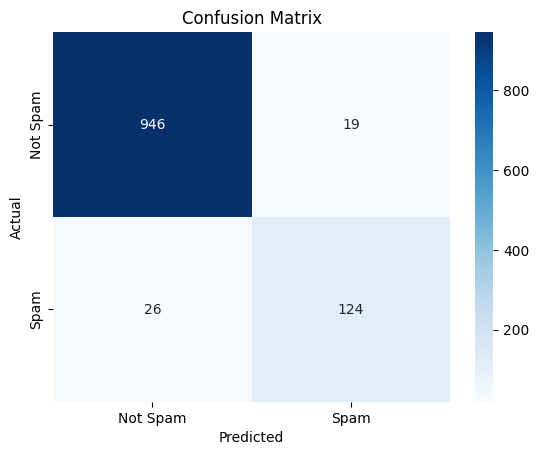

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Accuracy For All Model Classification

In [77]:
print("Accuracy for Randorm Forest Classification:", accuracy_rfc)
print("Accuracy for Naive Buyes Classification :", accuracy_nvc)
print("Accuracy For Support Vector Machine:", accuracy_svm)
print("Accuracy for Logistic Regression Model:", accuracy_lrm)
print("Accuracy For KNN:", accuracy_knn)
print("Accuracy For Decission Tree Classification:", accuracy_dt)
print("Accuracy ForGaussian Naive Bayes:", accuracy_gnb)
print("Accuracy For Ensemble Method Classification:", accuracy_em)

Accuracy for Randorm Forest Classification: 0.9766816143497757
Accuracy for Naive Buyes Classification : 0.9641255605381166
Accuracy For Support Vector Machine: 0.9775784753363229
Accuracy for Logistic Regression Model: 0.9452914798206278
Accuracy For KNN: 0.9121076233183857
Accuracy For Decission Tree Classification: 0.9596412556053812
Accuracy ForGaussian Naive Bayes: 0.8600896860986547
Accuracy For Ensemble Method Classification: 0.9730941704035875


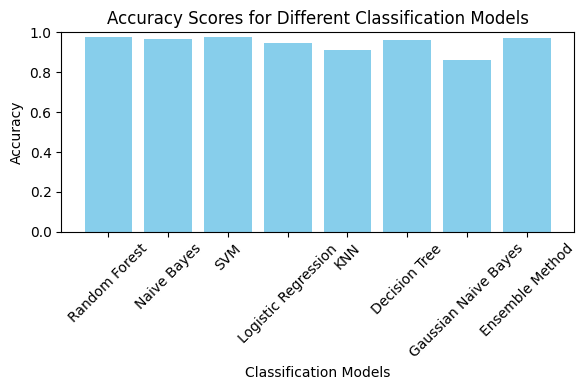

In [78]:
import matplotlib.pyplot as plt

# List of accuracy scores for different models
accuracies = [accuracy_rfc, accuracy_nvc, accuracy_svm, accuracy_lrm, accuracy_knn, accuracy_dt, accuracy_gnb, accuracy_em]

# List of model names
model_names = ["Random Forest", "Naive Bayes", "SVM", "Logistic Regression", "KNN", "Decision Tree", "Gaussian Naive Bayes", "Ensemble Method"]

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Classification Models')
plt.ylim(0, 1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


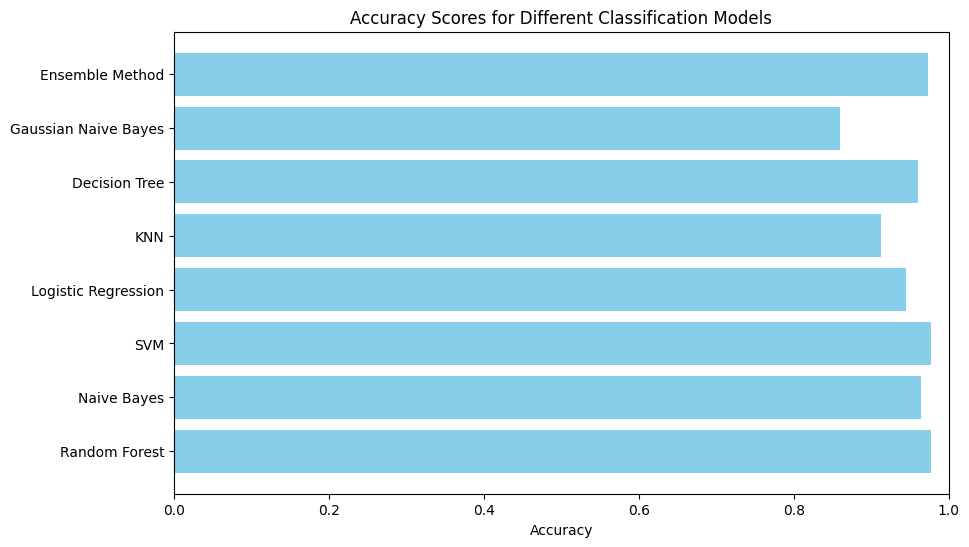

In [79]:
import matplotlib.pyplot as plt

# List of accuracy scores for different models
accuracies = [accuracy_rfc, accuracy_nvc, accuracy_svm, accuracy_lrm, accuracy_knn, accuracy_dt, accuracy_gnb, accuracy_em]

# List of model names
model_names = ["Random Forest", "Naive Bayes", "SVM", "Logistic Regression", "KNN", "Decision Tree", "Gaussian Naive Bayes", "Ensemble Method"]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy Scores for Different Classification Models')
plt.xlim(0, 1)

# Display the plot
plt.show()


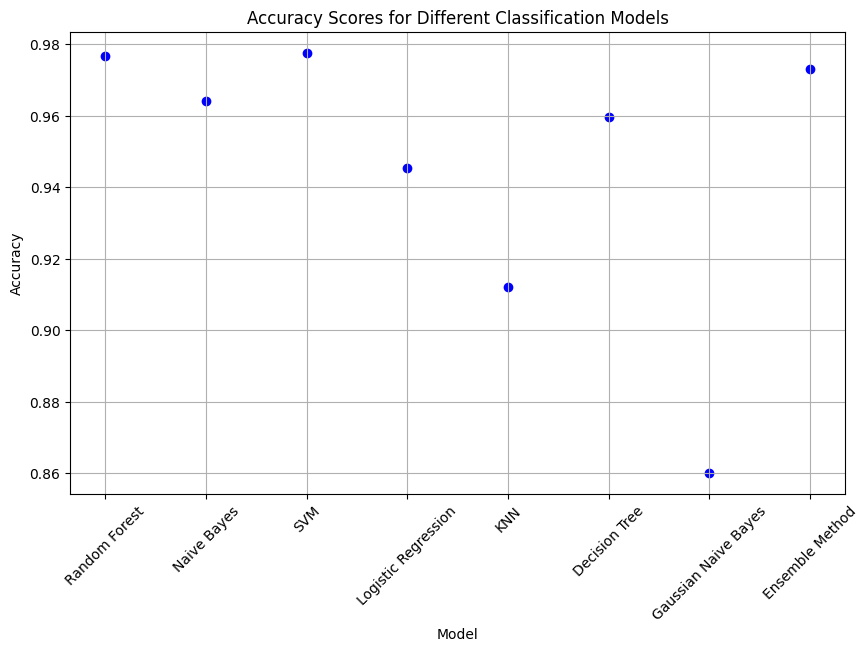

In [80]:
import matplotlib.pyplot as plt

# List of accuracy scores for different models
accuracies = [accuracy_rfc, accuracy_nvc, accuracy_svm, accuracy_lrm, accuracy_knn, accuracy_dt, accuracy_gnb, accuracy_em]

# List of model names
model_names = ["Random Forest", "Naive Bayes", "SVM", "Logistic Regression", "KNN", "Decision Tree", "Gaussian Naive Bayes", "Ensemble Method"]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_names, accuracies, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Classification Models')
plt.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout, Reshape

# Reshape the TF-IDF matrix to make it compatible with Conv1D
X_train_reshaped = X_train.toarray().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.toarray().reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
model = Sequential()

# Add a 1D convolutional layer with 128 filters, kernel size 5, and ReLU activation
model.add(Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a global max pooling layer
model.add(GlobalMaxPooling1D())

# Add a fully connected layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Output layer with one unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X_train_reshaped, y_train, epochs=5, batch_size=64, validation_data=(X_test_reshaped, y_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6822, 128)         768       
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [82]:
# Evaluate the model on the test set
accuracy_cnn = model.evaluate(X_test_reshaped, y_test, verbose=0)[1]

# Print the accuracy
print("Accuracy for CNN Classification:", accuracy_cnn)


Accuracy for CNN Classification: 0.865470826625824


In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
ann_model = Sequential()

# Add a Dense layer with 128 units and ReLU activation for the input layer
ann_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))

# Add a dropout layer for regularization
ann_model.add(Dropout(0.5))

# Add another Dense layer with 64 units and ReLU activation
ann_model.add(Dense(256, activation='relu'))

# Add a dropout layer for regularization
ann_model.add(Dropout(0.5))

# Output layer with one unit and sigmoid activation for binary classification
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
ann_model.summary()

# Train the model
ann_model.fit(X_train.toarray(), y_train, epochs=20, batch_size=65, validation_data=(X_test.toarray(), y_test))

# Evaluate the model on the test set
accuracy_ann = ann_model.evaluate(X_test.toarray(), y_test, verbose=0)[1]

# Print the accuracy
print("Accuracy for ANN Classification:", accuracy_ann)

model.save("spam.h5")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               873856    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 907137 (3.46 MB)
Trainable params: 907137 (3.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
69/69 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
print("Accuracy for Randorm Forest Classification:", accuracy_rfc)
print("Accuracy for Naive Buyes Classification :", accuracy_nvc)
print("Accuracy For Support Vector Machine:", accuracy_svm)
print("Accuracy for Logistic Regression Model:", accuracy_lrm)
print("Accuracy For KNN:", accuracy_knn)
print("Accuracy For Decission Tree Classification:", accuracy_dt)
print("Accuracy ForGaussian Naive Bayes:", accuracy_gnb)
print("Accuracy For Ensemble Method Classification:", accuracy_em)
print("Accuracy For Convolution Neural Network:", accuracy_cnn)
print("Accuracy For Artificial Neural Network", accuracy_ann)

Accuracy for Randorm Forest Classification: 0.9766816143497757
Accuracy for Naive Buyes Classification : 0.9641255605381166
Accuracy For Support Vector Machine: 0.9775784753363229
Accuracy for Logistic Regression Model: 0.9452914798206278
Accuracy For KNN: 0.9121076233183857
Accuracy For Decission Tree Classification: 0.9596412556053812
Accuracy ForGaussian Naive Bayes: 0.8600896860986547
Accuracy For Ensemble Method Classification: 0.9730941704035875
Accuracy For Convolution Neural Network: 0.865470826625824
Accuracy For Artificial Neural Network 0.9802690744400024


In [87]:
!pip install gradio

In [103]:
import gradio as gr

# Load the saved model
model = tf.keras.models.load_model("spam.h5")

# Define the input and output components
input_component = gr.Textbox()
output_component = gr.Label(num_top_classes=1)

# Define the prediction function
def predict(text):
    # Preprocess the text
    text = preprocess_text(text)

    # Convert the text to a TF-IDF vector
    input_tfidf = tfidf_vectorizer.transform([text])

    # Make a prediction using the trained model
    prediction = model.predict(input_tfidf.toarray())

    print(prediction)

    # Convert the prediction to a label
    if prediction[0] > 0.1:
        label = "SPAM"
    else:
        label = "NOT SPAM"

    return label

# Create the interface
interface = gr.Interface(
    fn=predict,
    inputs=input_component,
    outputs=output_component,
    examples=[
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        "Hi John, how are you today?"
    ]
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b7d487409e47126d3c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
